In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV

In [32]:
df1=pd.read_excel('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/zomato_xml.xlsx')
df2=pd.read_excel('C:/Users/Admin/OneDrive/Desktop/EDUCATION/DATA SET_DATATRAINED/Country-Code.xlsx')
df=pd.merge(df1,df2)
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [33]:
print('Row,Column',df.shape)
print('==============================')
print('Column Names::',df.columns)

Row,Column (9551, 22)
Column Names:: Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')


In [34]:
for i in df:
    un=df[i].unique().size
    print(i,un)

Restaurant ID 9551
Restaurant Name 7446
Country Code 15
City 141
Address 8918
Locality 1208
Locality Verbose 1265
Longitude 8120
Latitude 8677
Cuisines 1826
Average Cost for two 140
Currency 12
Has Table booking 2
Has Online delivery 2
Is delivering now 2
Switch to order menu 1
Price range 4
Aggregate rating 33
Rating color 6
Rating text 6
Votes 1012
Country 15


In [35]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [36]:
df=df.drop(columns=['Restaurant ID','Restaurant Name','Address','Locality','Locality Verbose','Cuisines','Switch to order menu'])

In [37]:
df.isnull().sum()

Country Code            0
City                    0
Longitude               0
Latitude                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

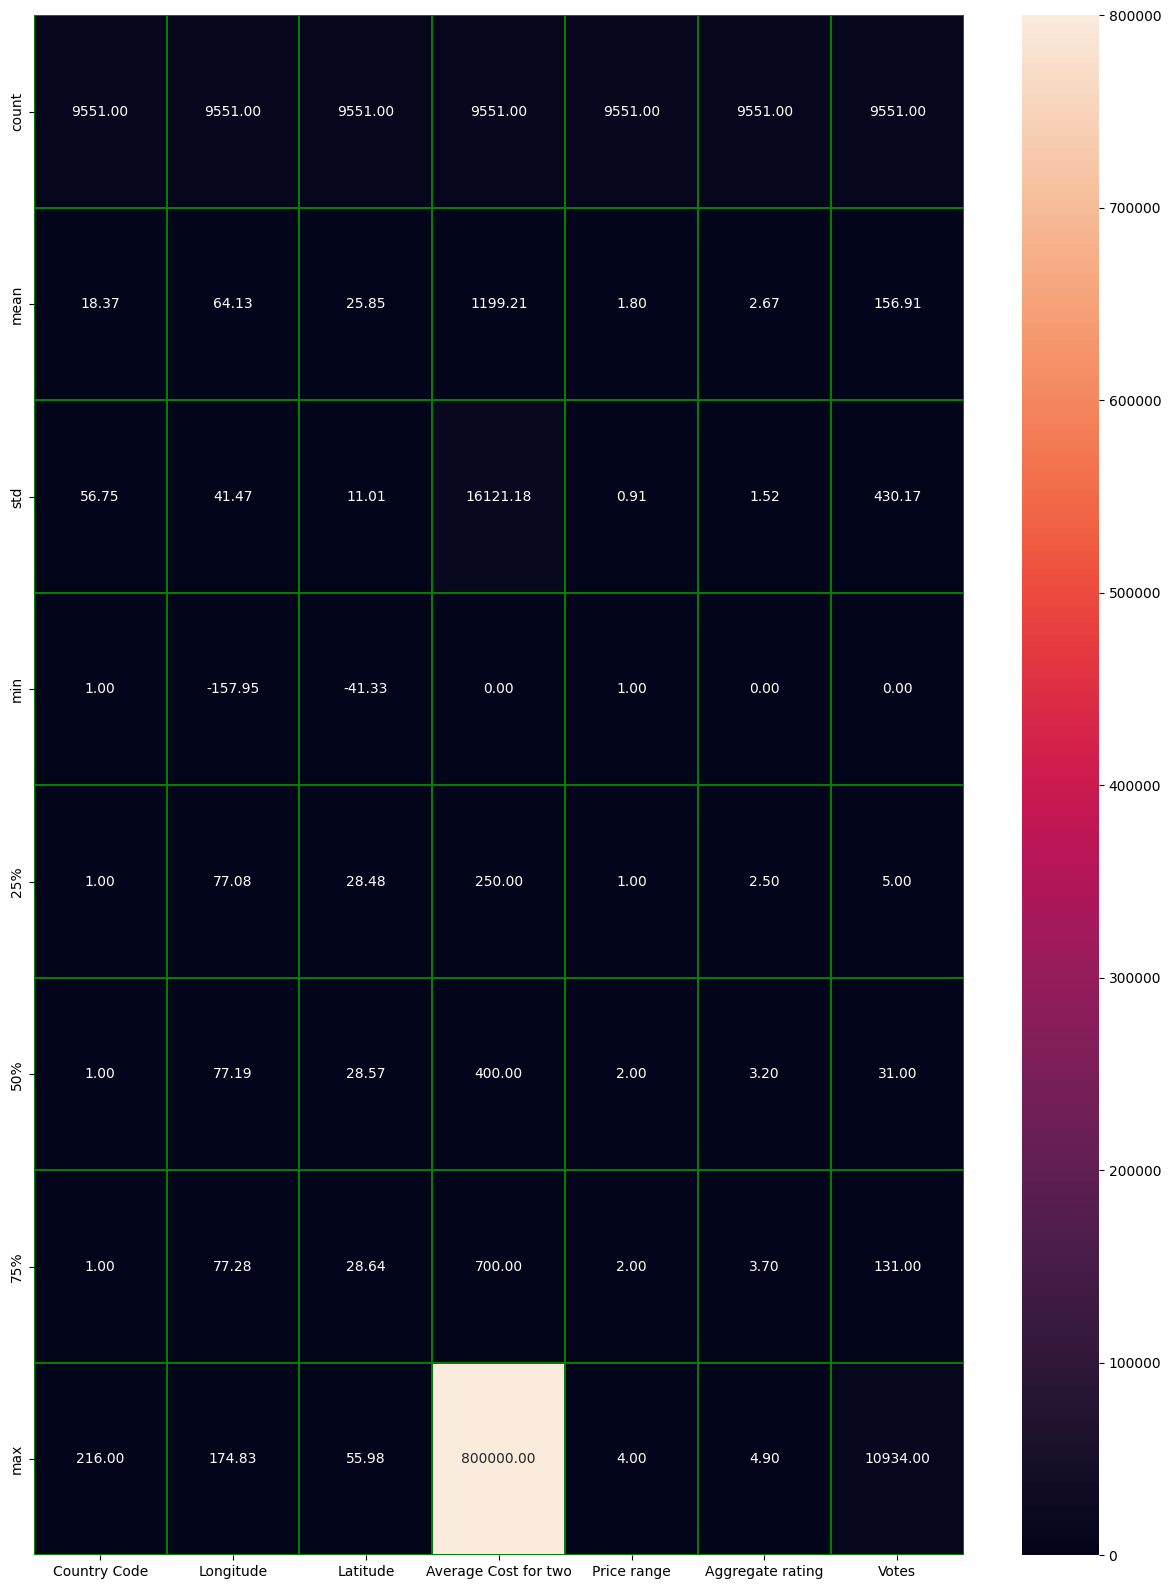

In [38]:
plt.figure(figsize=(15,20))
v=df.describe()
sns.heatmap(v,annot=True,fmt='0.2f',linewidths=0.2,linecolor='green')
plt.show()

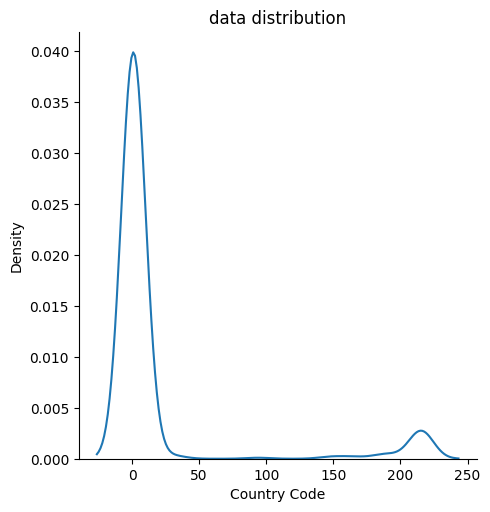

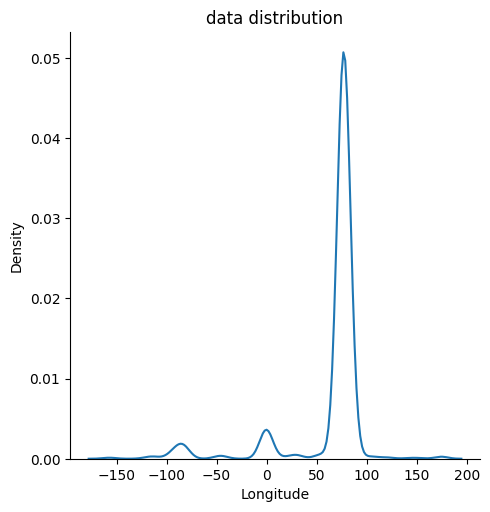

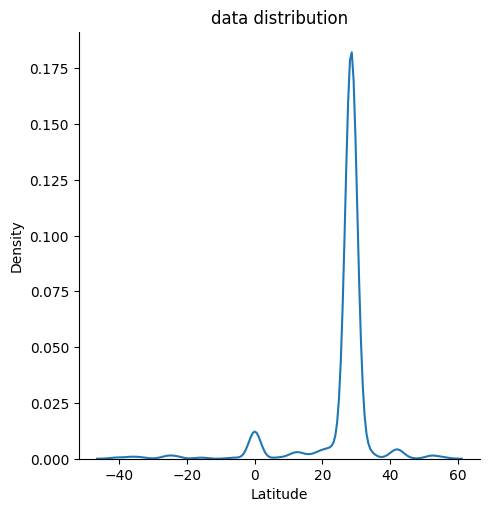

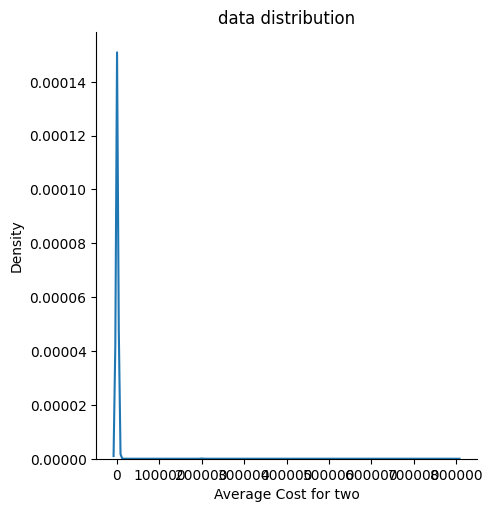

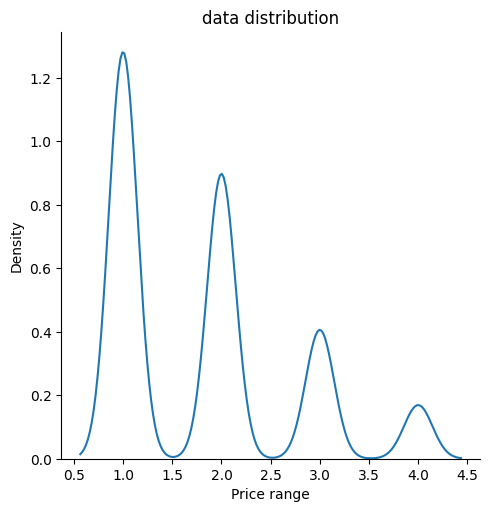

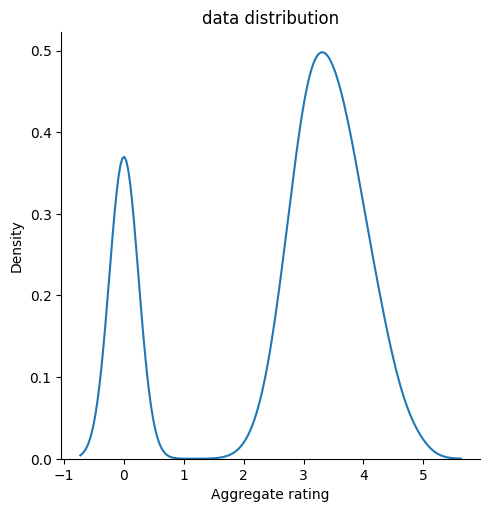

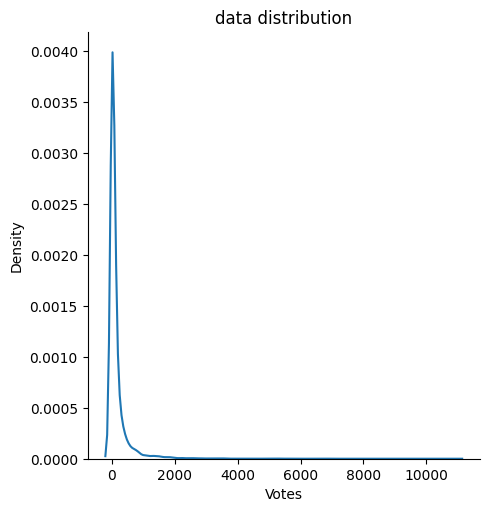

In [39]:
for i in df:
    if df[i].dtype=='int64'or df[i].dtypes=='float64':
        sns.displot(df,x=i,kind='kde')
        plt.xlabel(i)
        plt.title('data distribution')
        plt.show()
    else: pass 

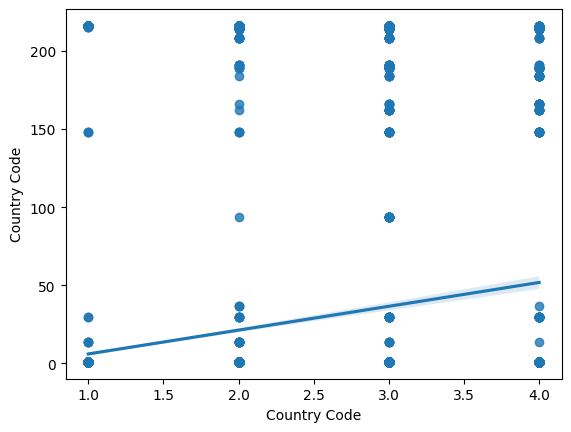

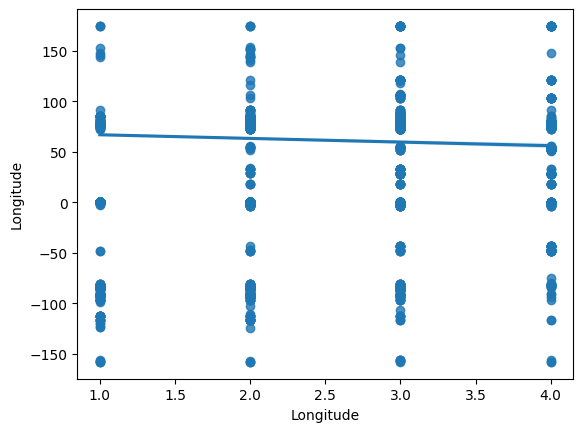

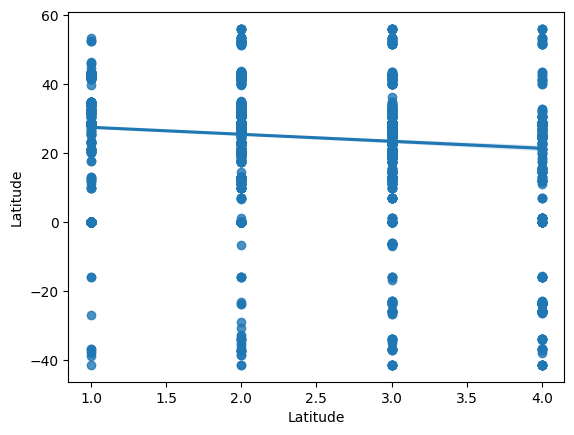

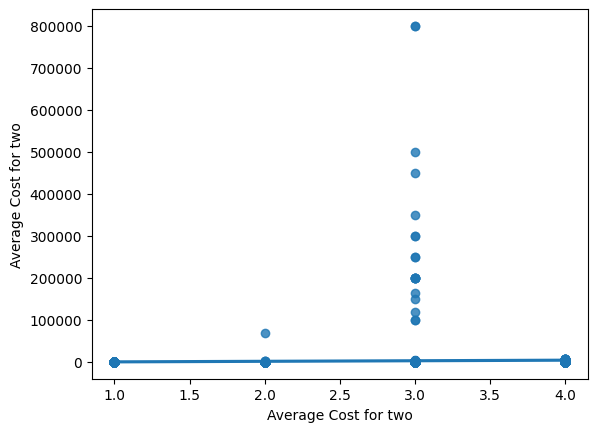

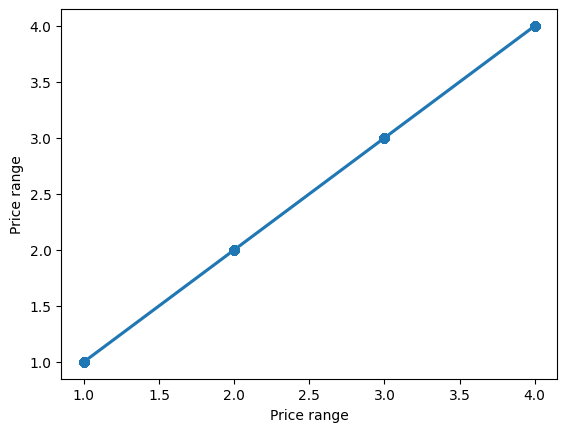

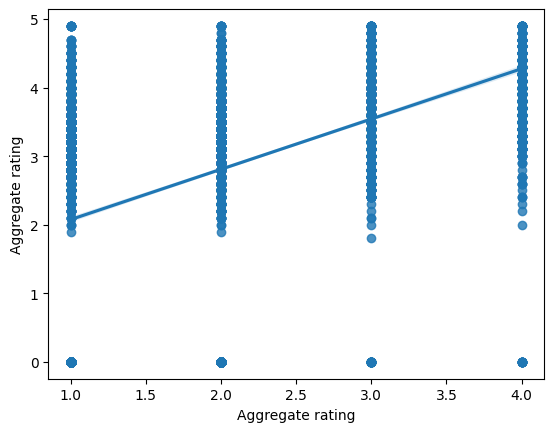

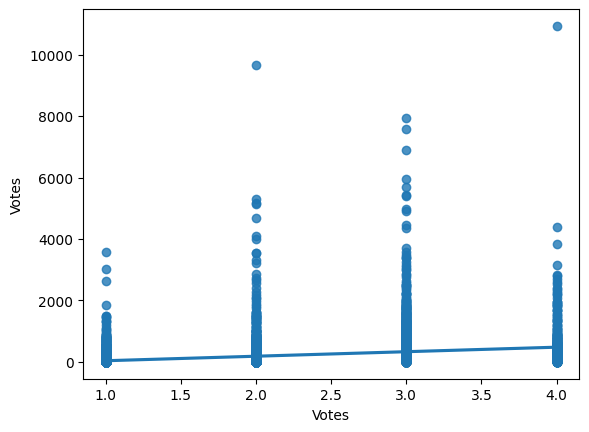

In [40]:
for i in df:
    if df[i].dtype=='int64'or df[i].dtypes=='float64':
        sns.regplot(df,x='Price range',y=i)
        plt.xlabel(i)
        plt.show()
    else: pass 

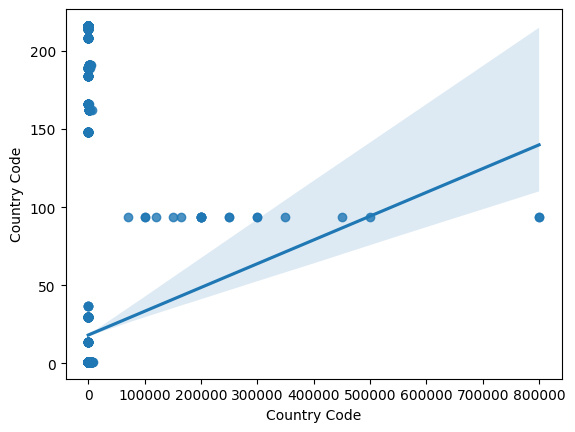

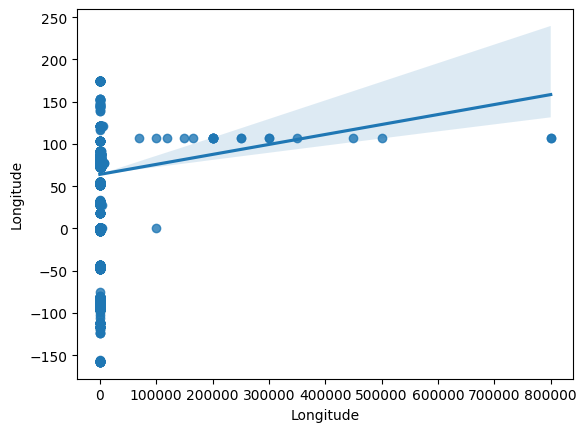

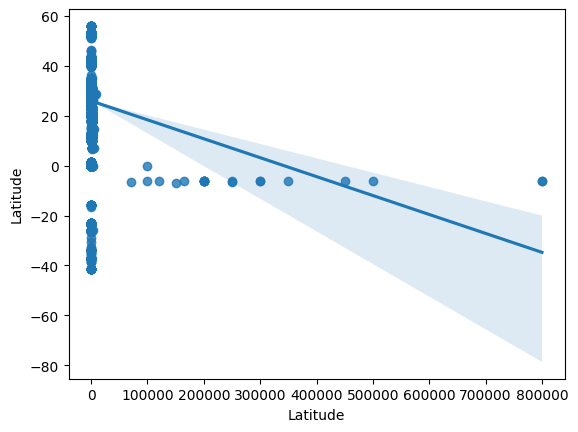

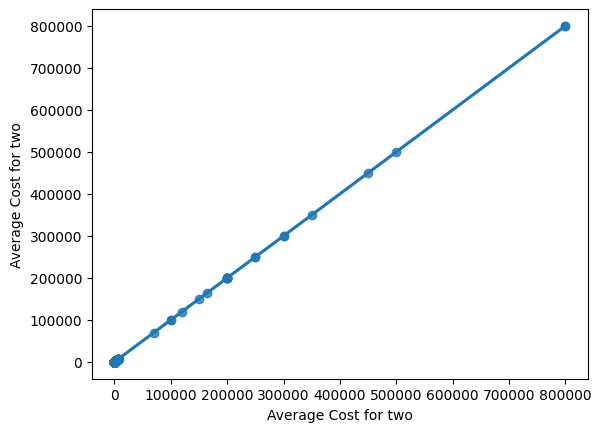

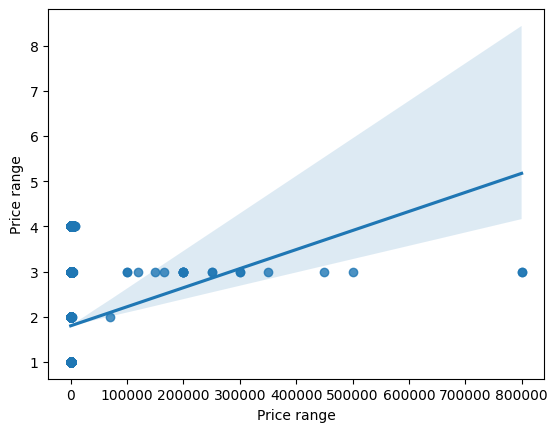

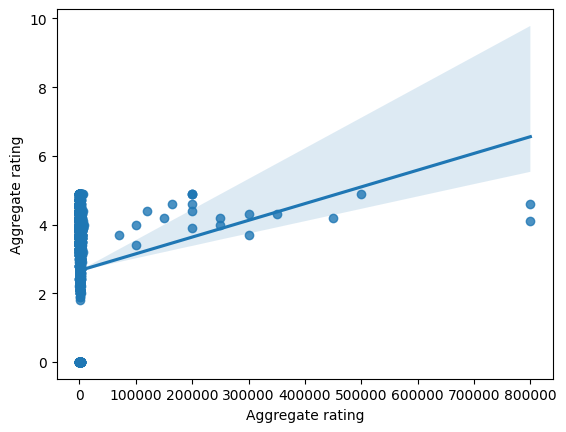

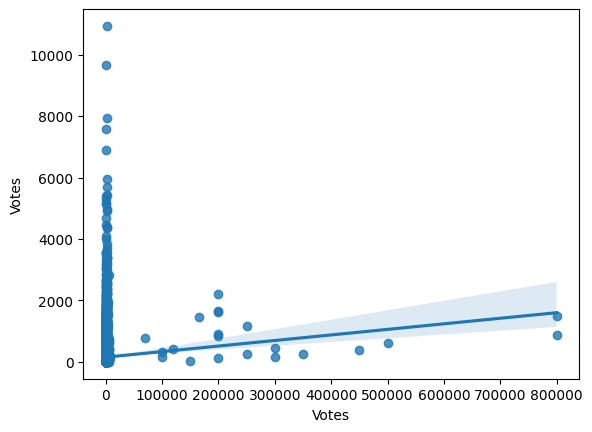

In [41]:
for i in df:
    if df[i].dtype=='int64'or df[i].dtypes=='float64':
        sns.regplot(df,x='Average Cost for two',y=i)
        plt.xlabel(i)
        plt.show()
    else: pass 

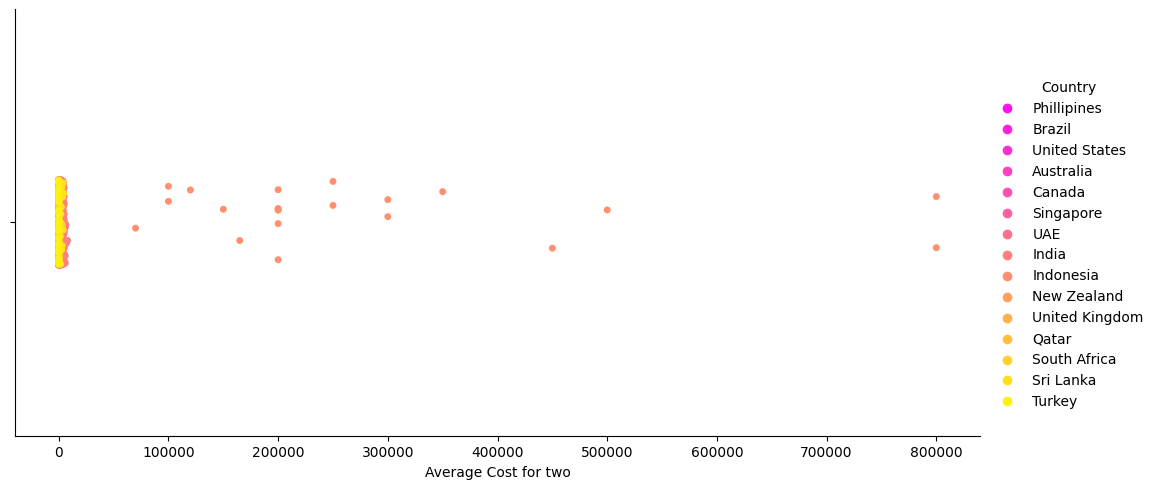

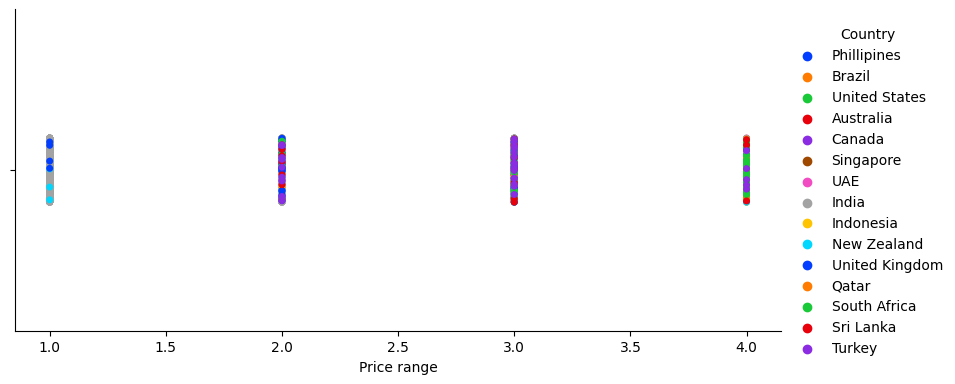

In [42]:
## Country wise varies of price range and Cost for Two:
sns.catplot(df,x='Average Cost for two',hue='Country',kind='strip',height=5,aspect=2,palette='spring')
sns.catplot(df,x='Price range',hue='Country',height=4,aspect=2,palette='bright')
plt.show()

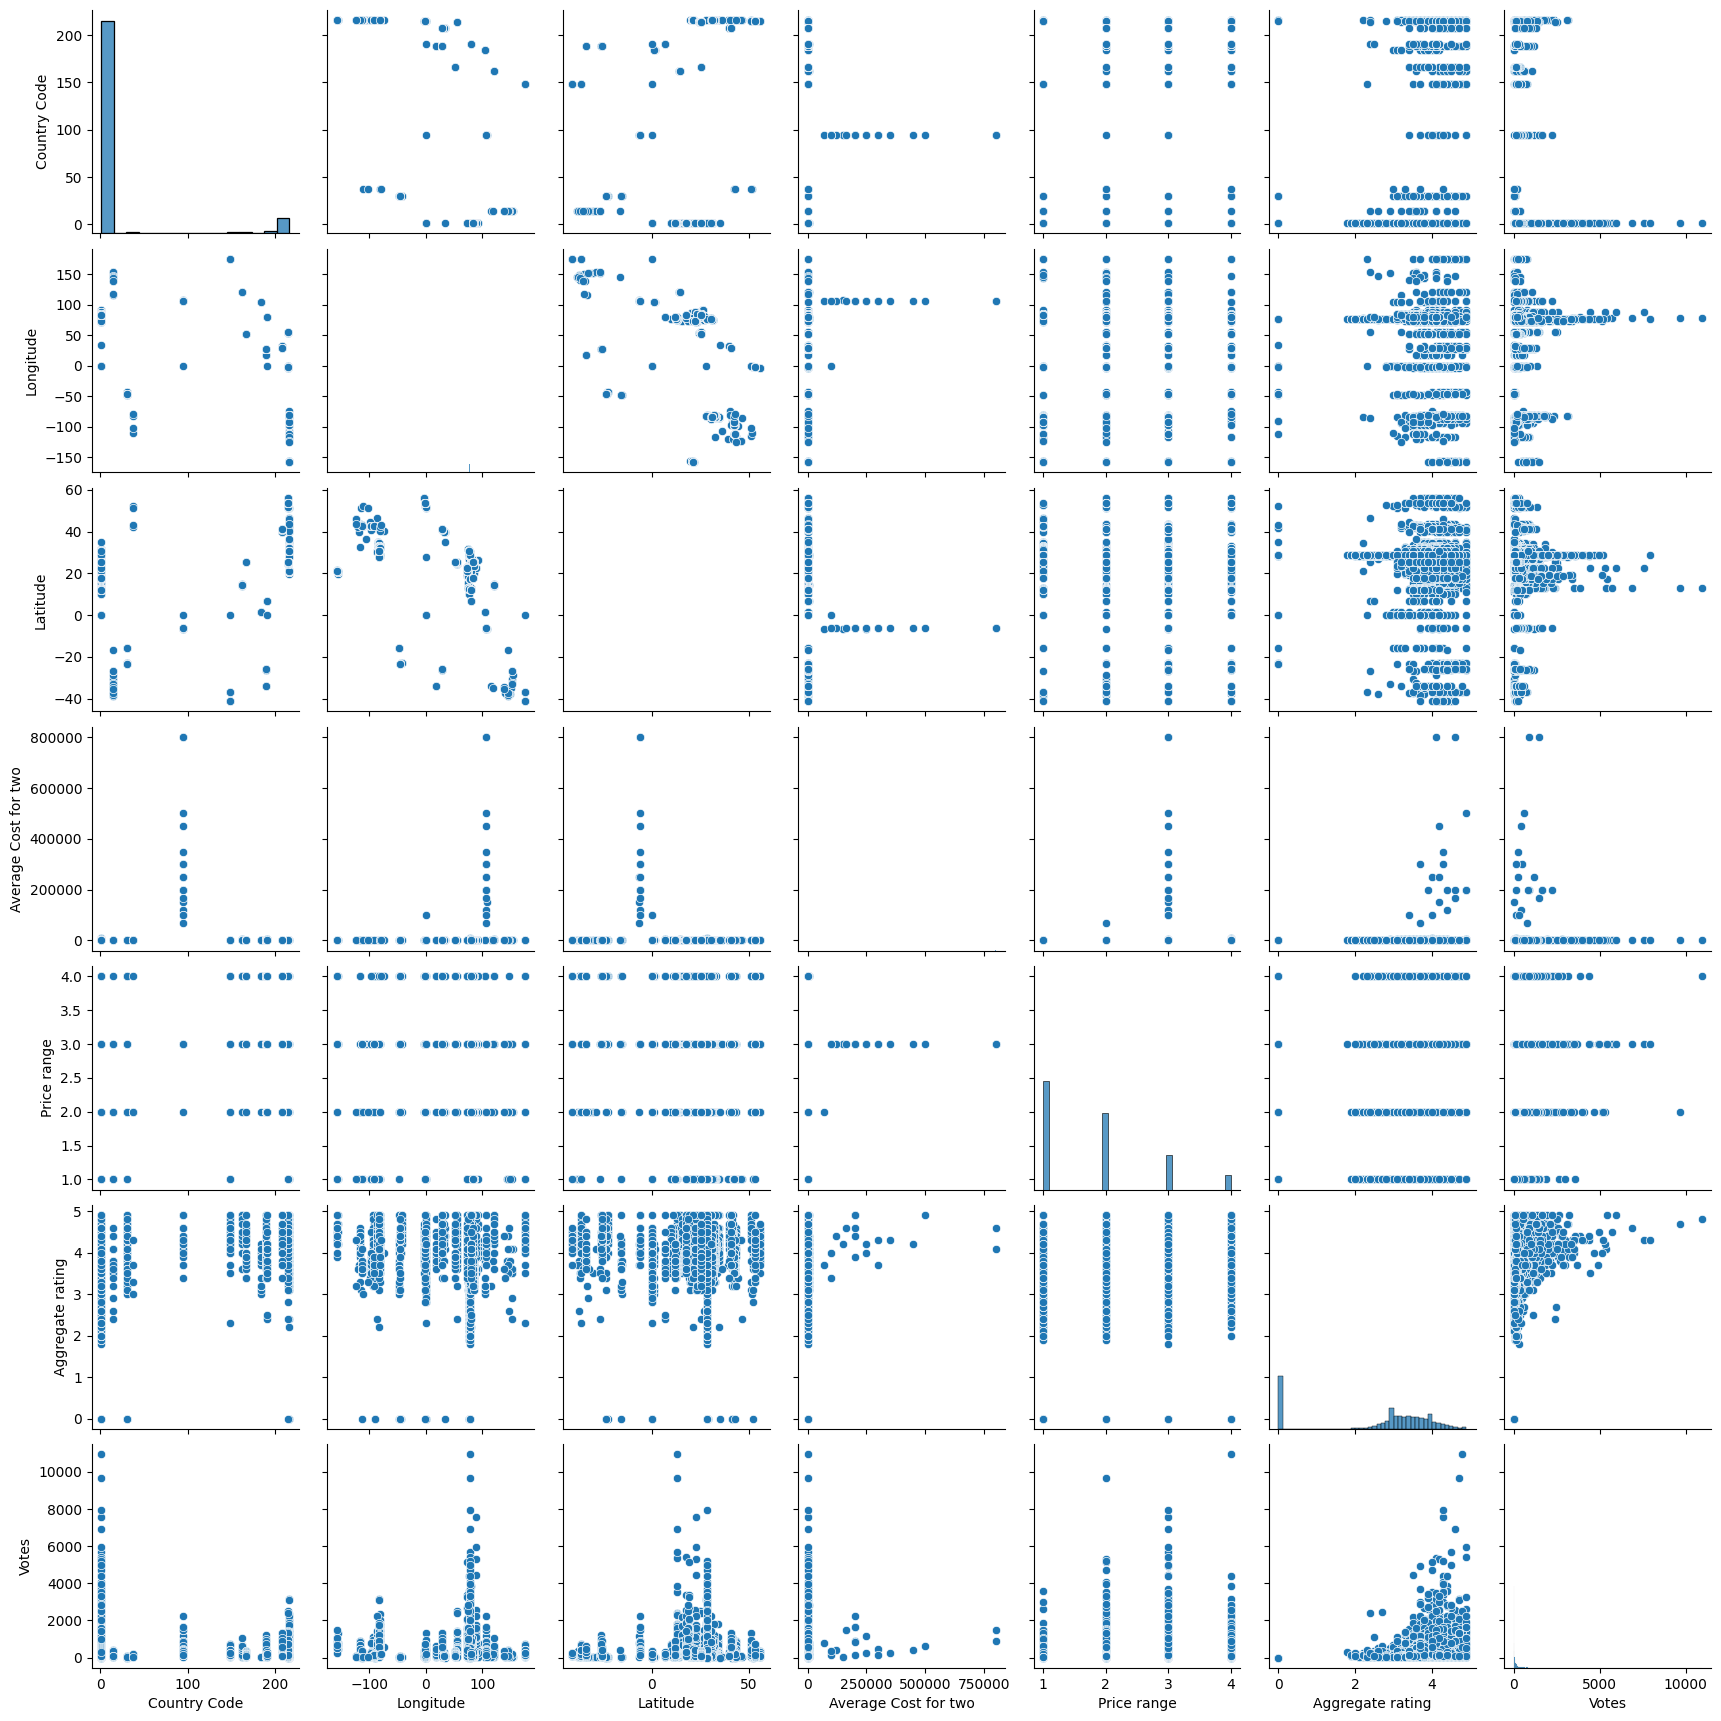

In [43]:
sns.pairplot(df)
plt.show()

In [44]:
oe=OrdinalEncoder()
for column in df:
    if df[column].dtypes==object:
        oe=OrdinalEncoder()
        df[column]=oe.fit_transform(df[column].values.reshape(-1,1))
    else:pass 


print(df)

      Country Code   City   Longitude   Latitude  Average Cost for two  \
0              162   73.0  121.027535  14.565443                  1100   
1              162   73.0  121.014101  14.553708                  1200   
2              162   75.0  121.056831  14.581404                  4000   
3              162   75.0  121.056475  14.585318                  1500   
4              162   75.0  121.057508  14.584450                  1500   
...            ...    ...         ...        ...                   ...   
9546           208  140.0   28.977392  41.022793                    80   
9547           208  140.0   29.041297  41.009847                   105   
9548           208  140.0   29.034640  41.055817                   170   
9549           208  140.0   29.036019  41.057979                   120   
9550           208  140.0   29.026016  40.984776                    55   

      Currency  Has Table booking  Has Online delivery  Is delivering now  \
0          0.0                1.0 

In [45]:
## Analysis the skew ness and modification
for i in df:
    x=df[i].skew()
    if x>=5:
        df[i]=np.cbrt(df[i])
    else:pass 
print('modified skewness of "df_data" is:')
print('=======================================')
print(df.skew())

modified skewness of "df_data" is:
Country Code             3.043965
City                    -1.193777
Longitude               -2.807328
Latitude                -3.081635
Average Cost for two     9.626632
Currency                 2.858093
Has Table booking        2.321100
Has Online delivery      1.114620
Is delivering now       16.673412
Price range              0.889618
Aggregate rating        -0.954130
Rating color             0.046009
Rating text              0.431408
Votes                    1.204920
Country                  3.312721
dtype: float64


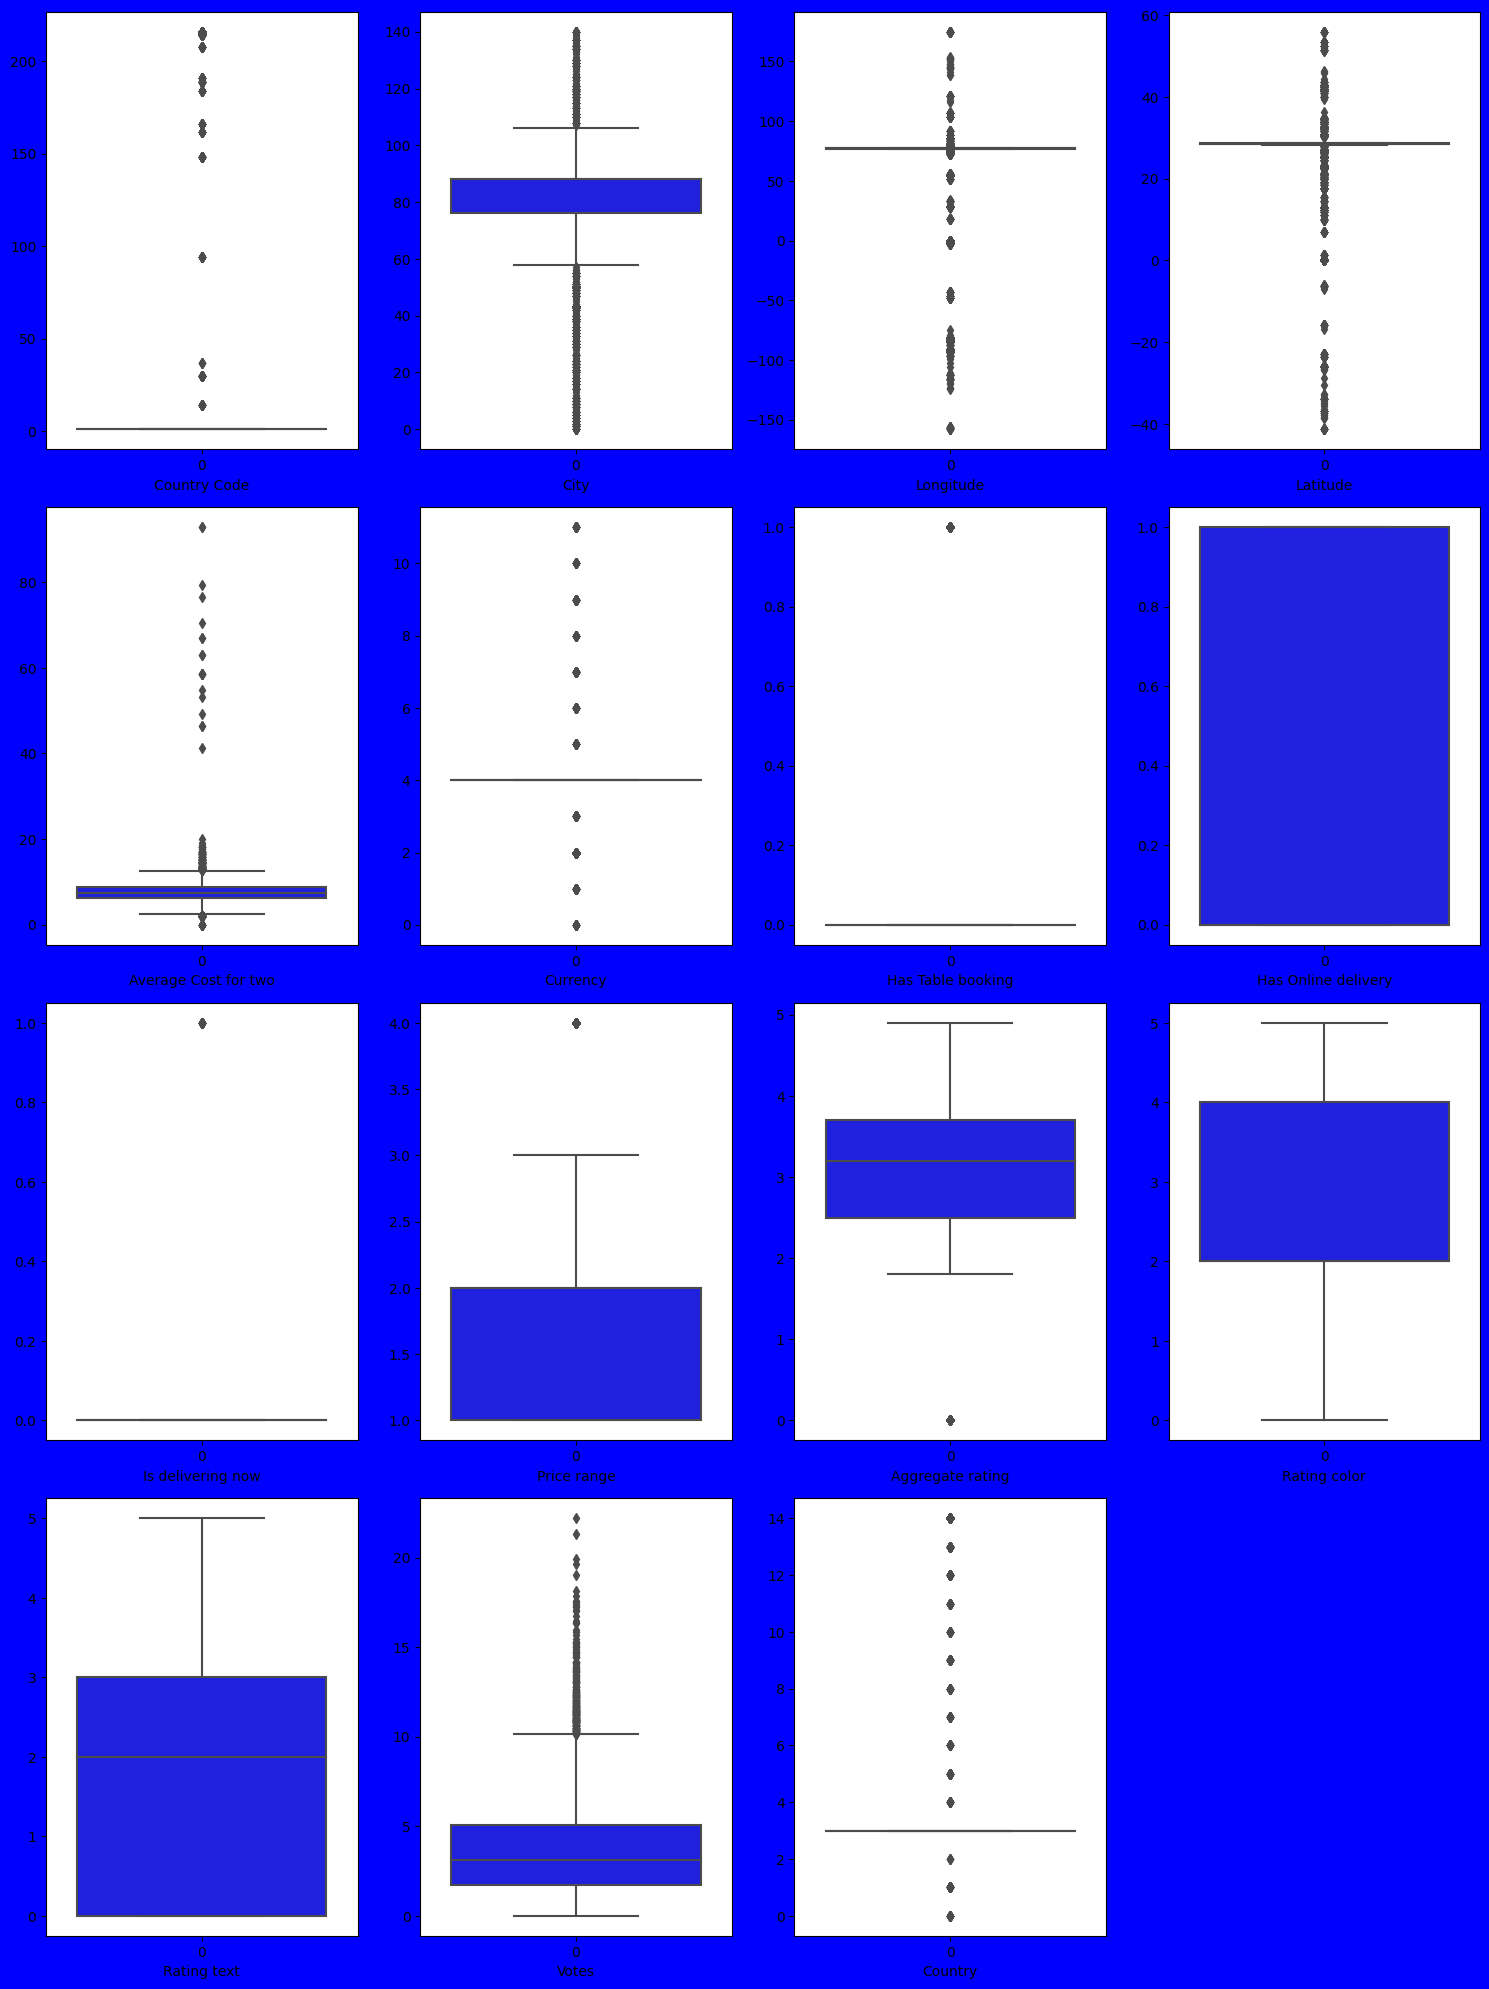

In [46]:
plt.figure(figsize=(15,20),facecolor='blue')
plotnumber=1
for column in df:
    plt.subplot(4,4,plotnumber)
    sns.boxplot(df[column],color='blue')
    plt.xlabel(column)
    plotnumber+=1
plt.tight_layout() 

In [47]:
columns=df.columns
out_lier=df[columns]
z=np.abs(zscore(out_lier))
## Removing outlier
df_z=df[(z<3).all(axis=1)]
print('## dataloss:')
print((df.shape[0]-df_z.shape[0])/(df.shape[0])*100)

## dataloss:
11.569469165532405


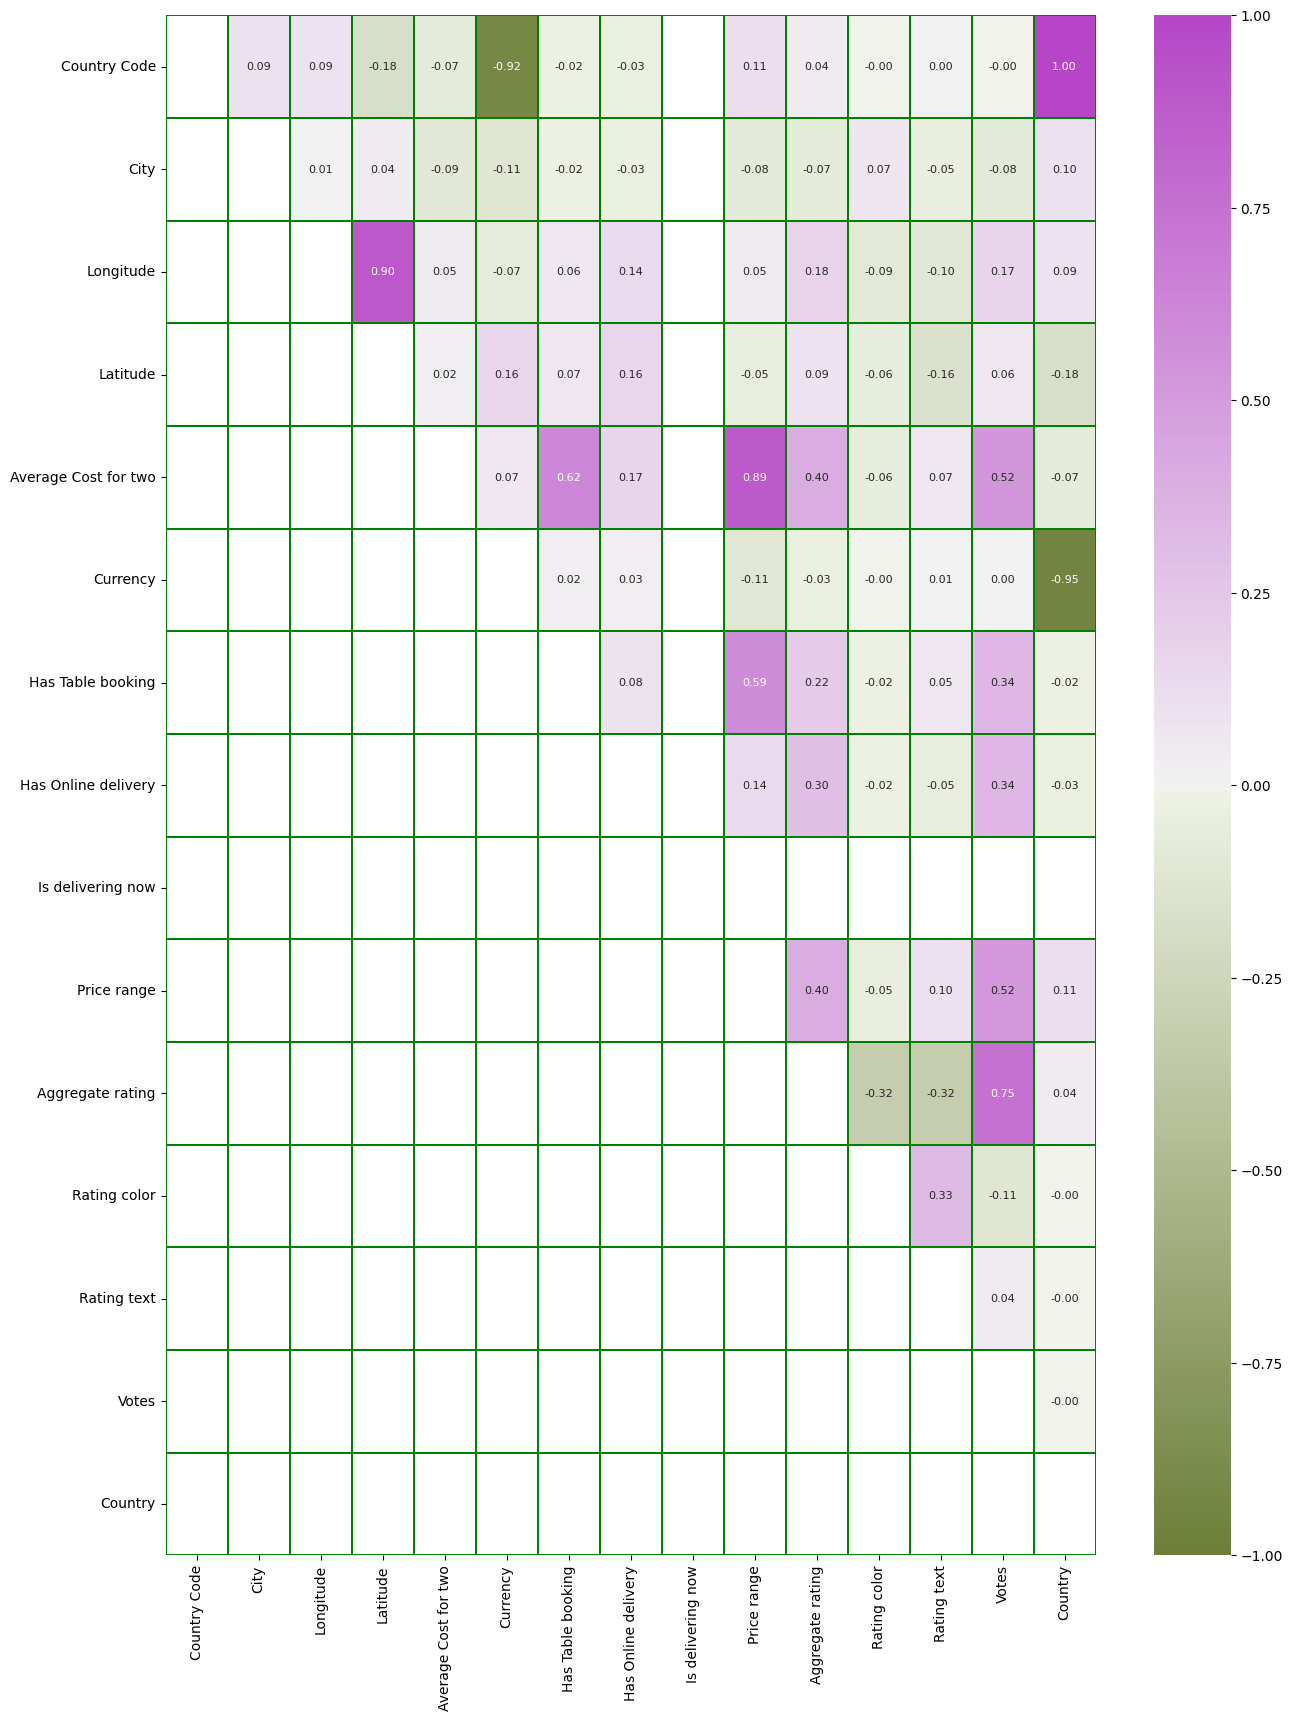

In [48]:
v=df_z.corr()
plt.figure(figsize=(15,20))
mask=np.zeros_like(v)
mask[np.tril_indices_from(mask)]=True
sns.heatmap(v,vmax=1,vmin=-1,annot=True,annot_kws={'fontsize':8},fmt='0.2f',linewidths=0.2,linecolor='green',mask=mask,cmap=sns.diverging_palette(100,300,as_cmap=True))
plt.show()

In [56]:
## Feature and label selection
x=df_z.drop(columns=['Price range','Average Cost for two'])
y=df_z[['Price range','Average Cost for two']]

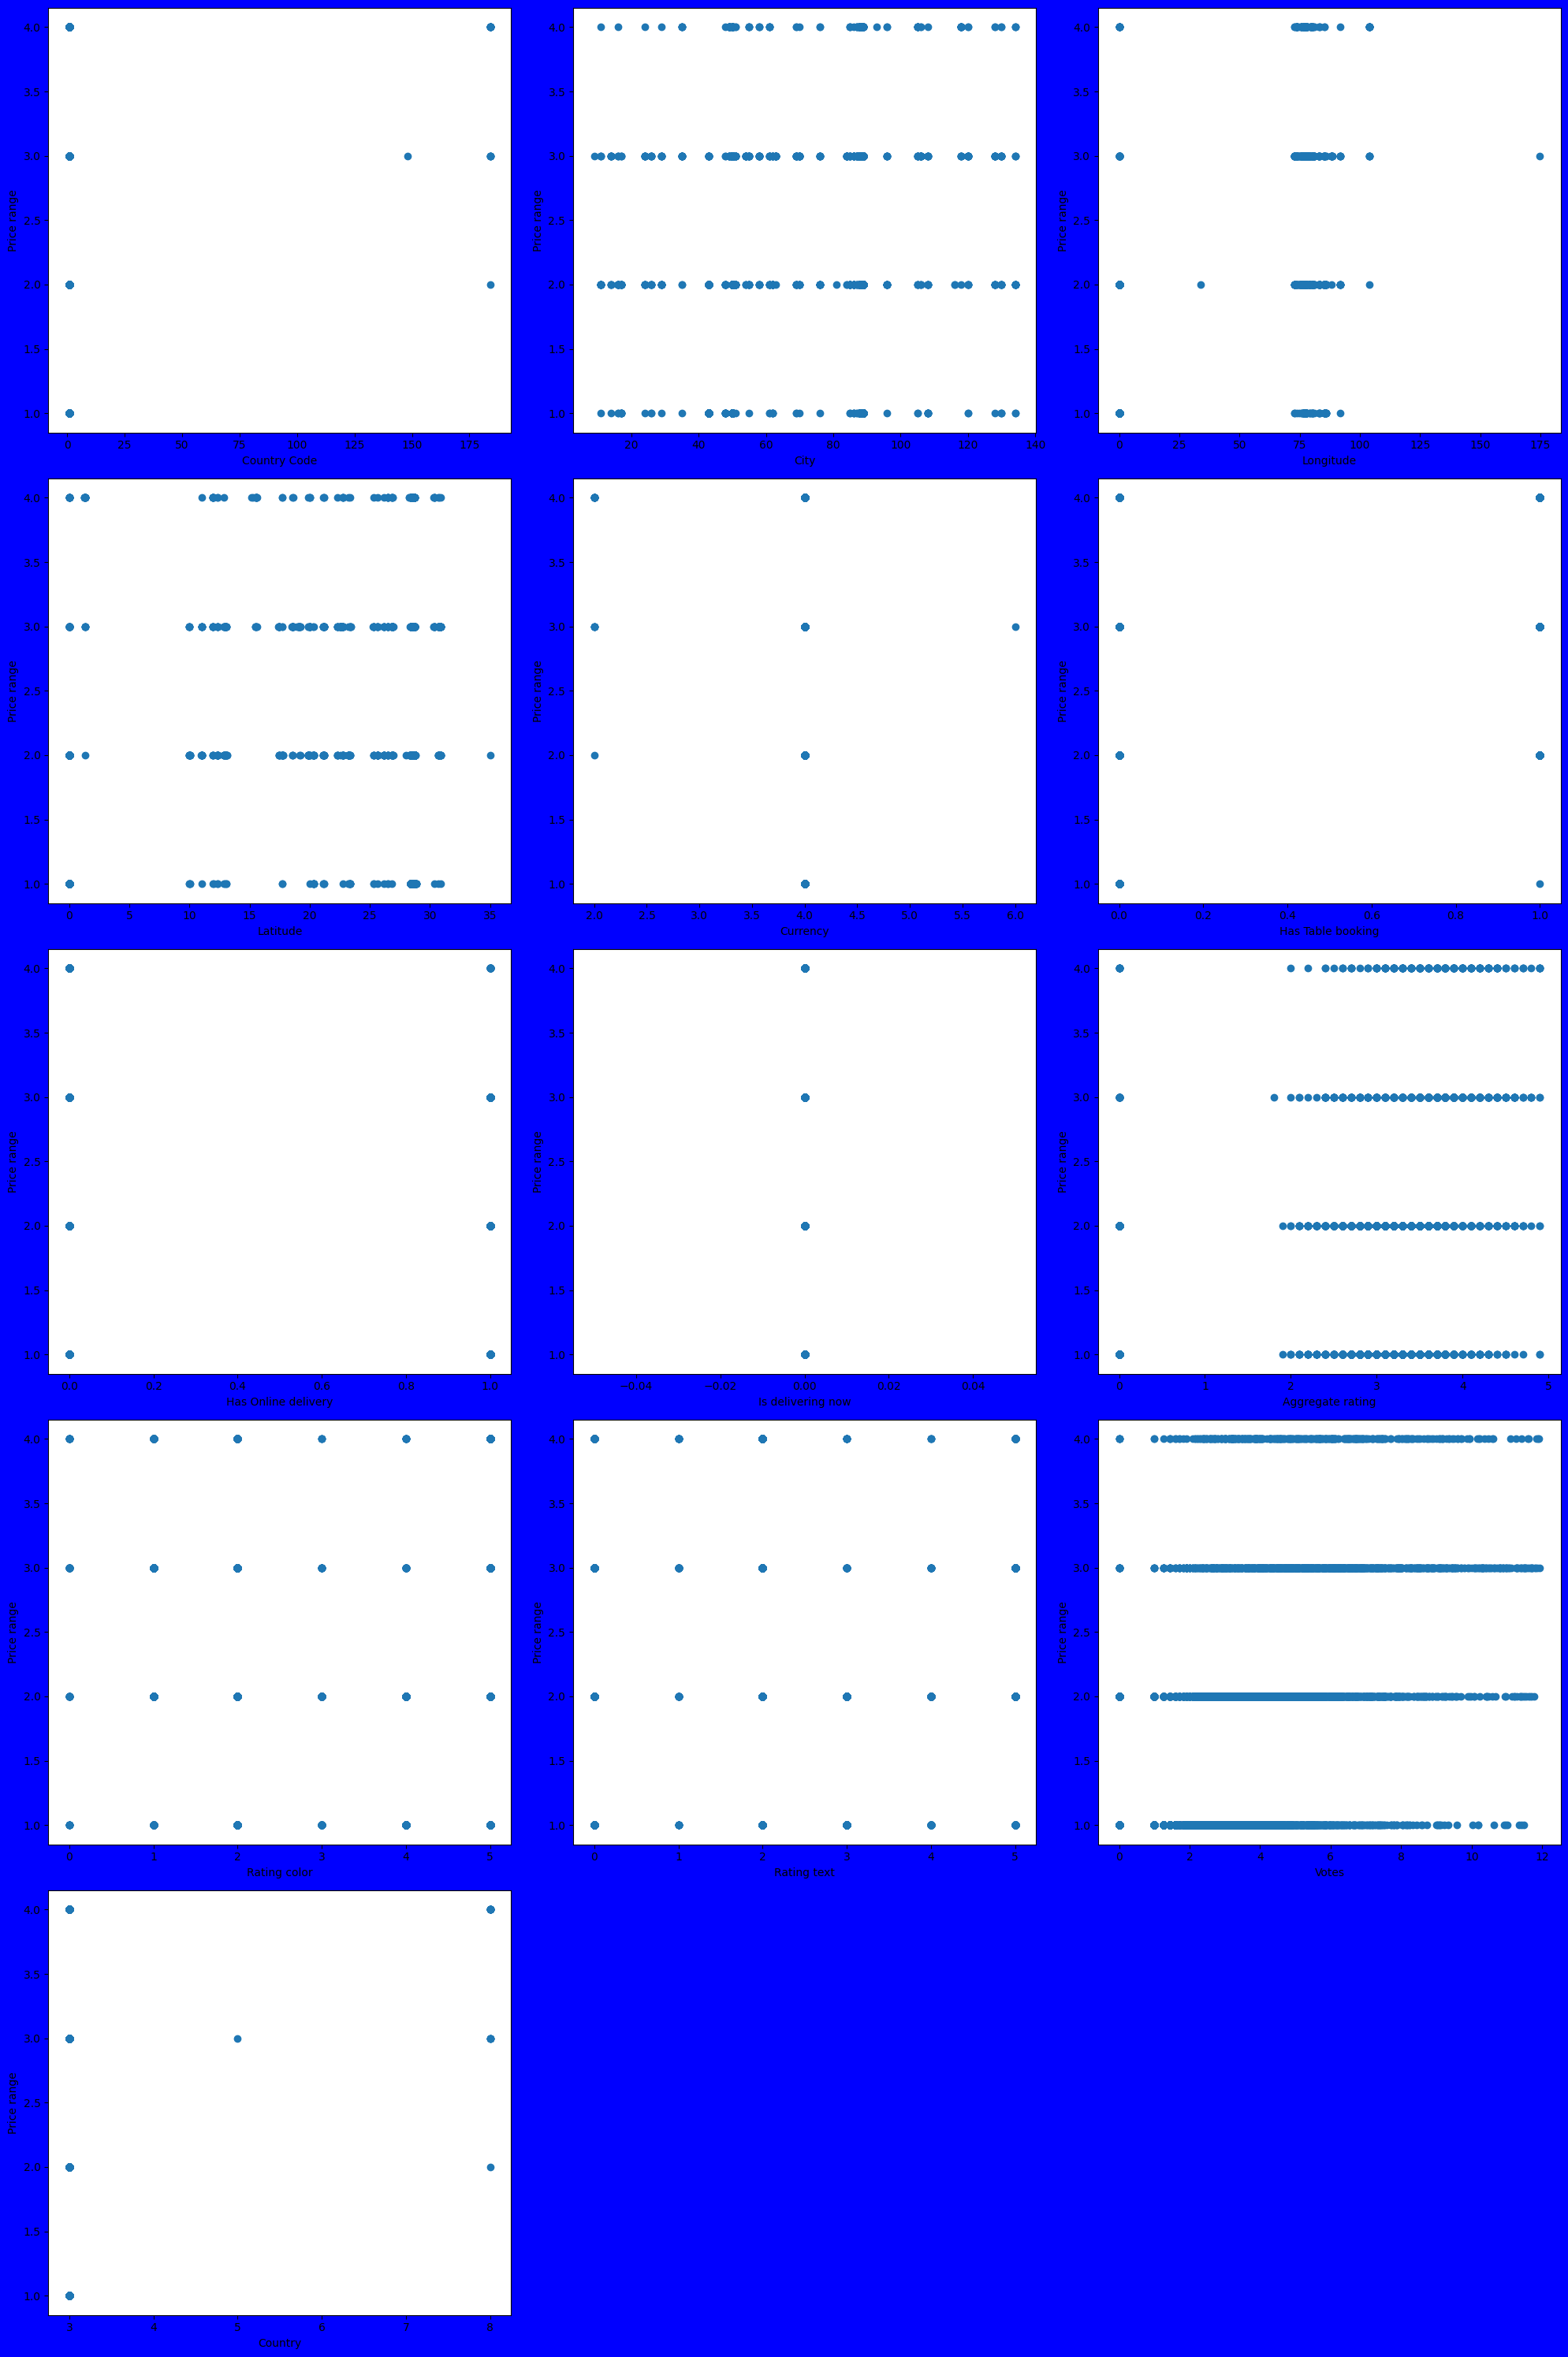

In [57]:
plt.figure(figsize=(20,30), facecolor= 'blue')
plotnumber=1
for column in x:
    if plotnumber <=15:
        plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y['Price range'])
        plt.xlabel(column)
        plt.ylabel('Price range')
        plotnumber+=1
plt.tight_layout() 

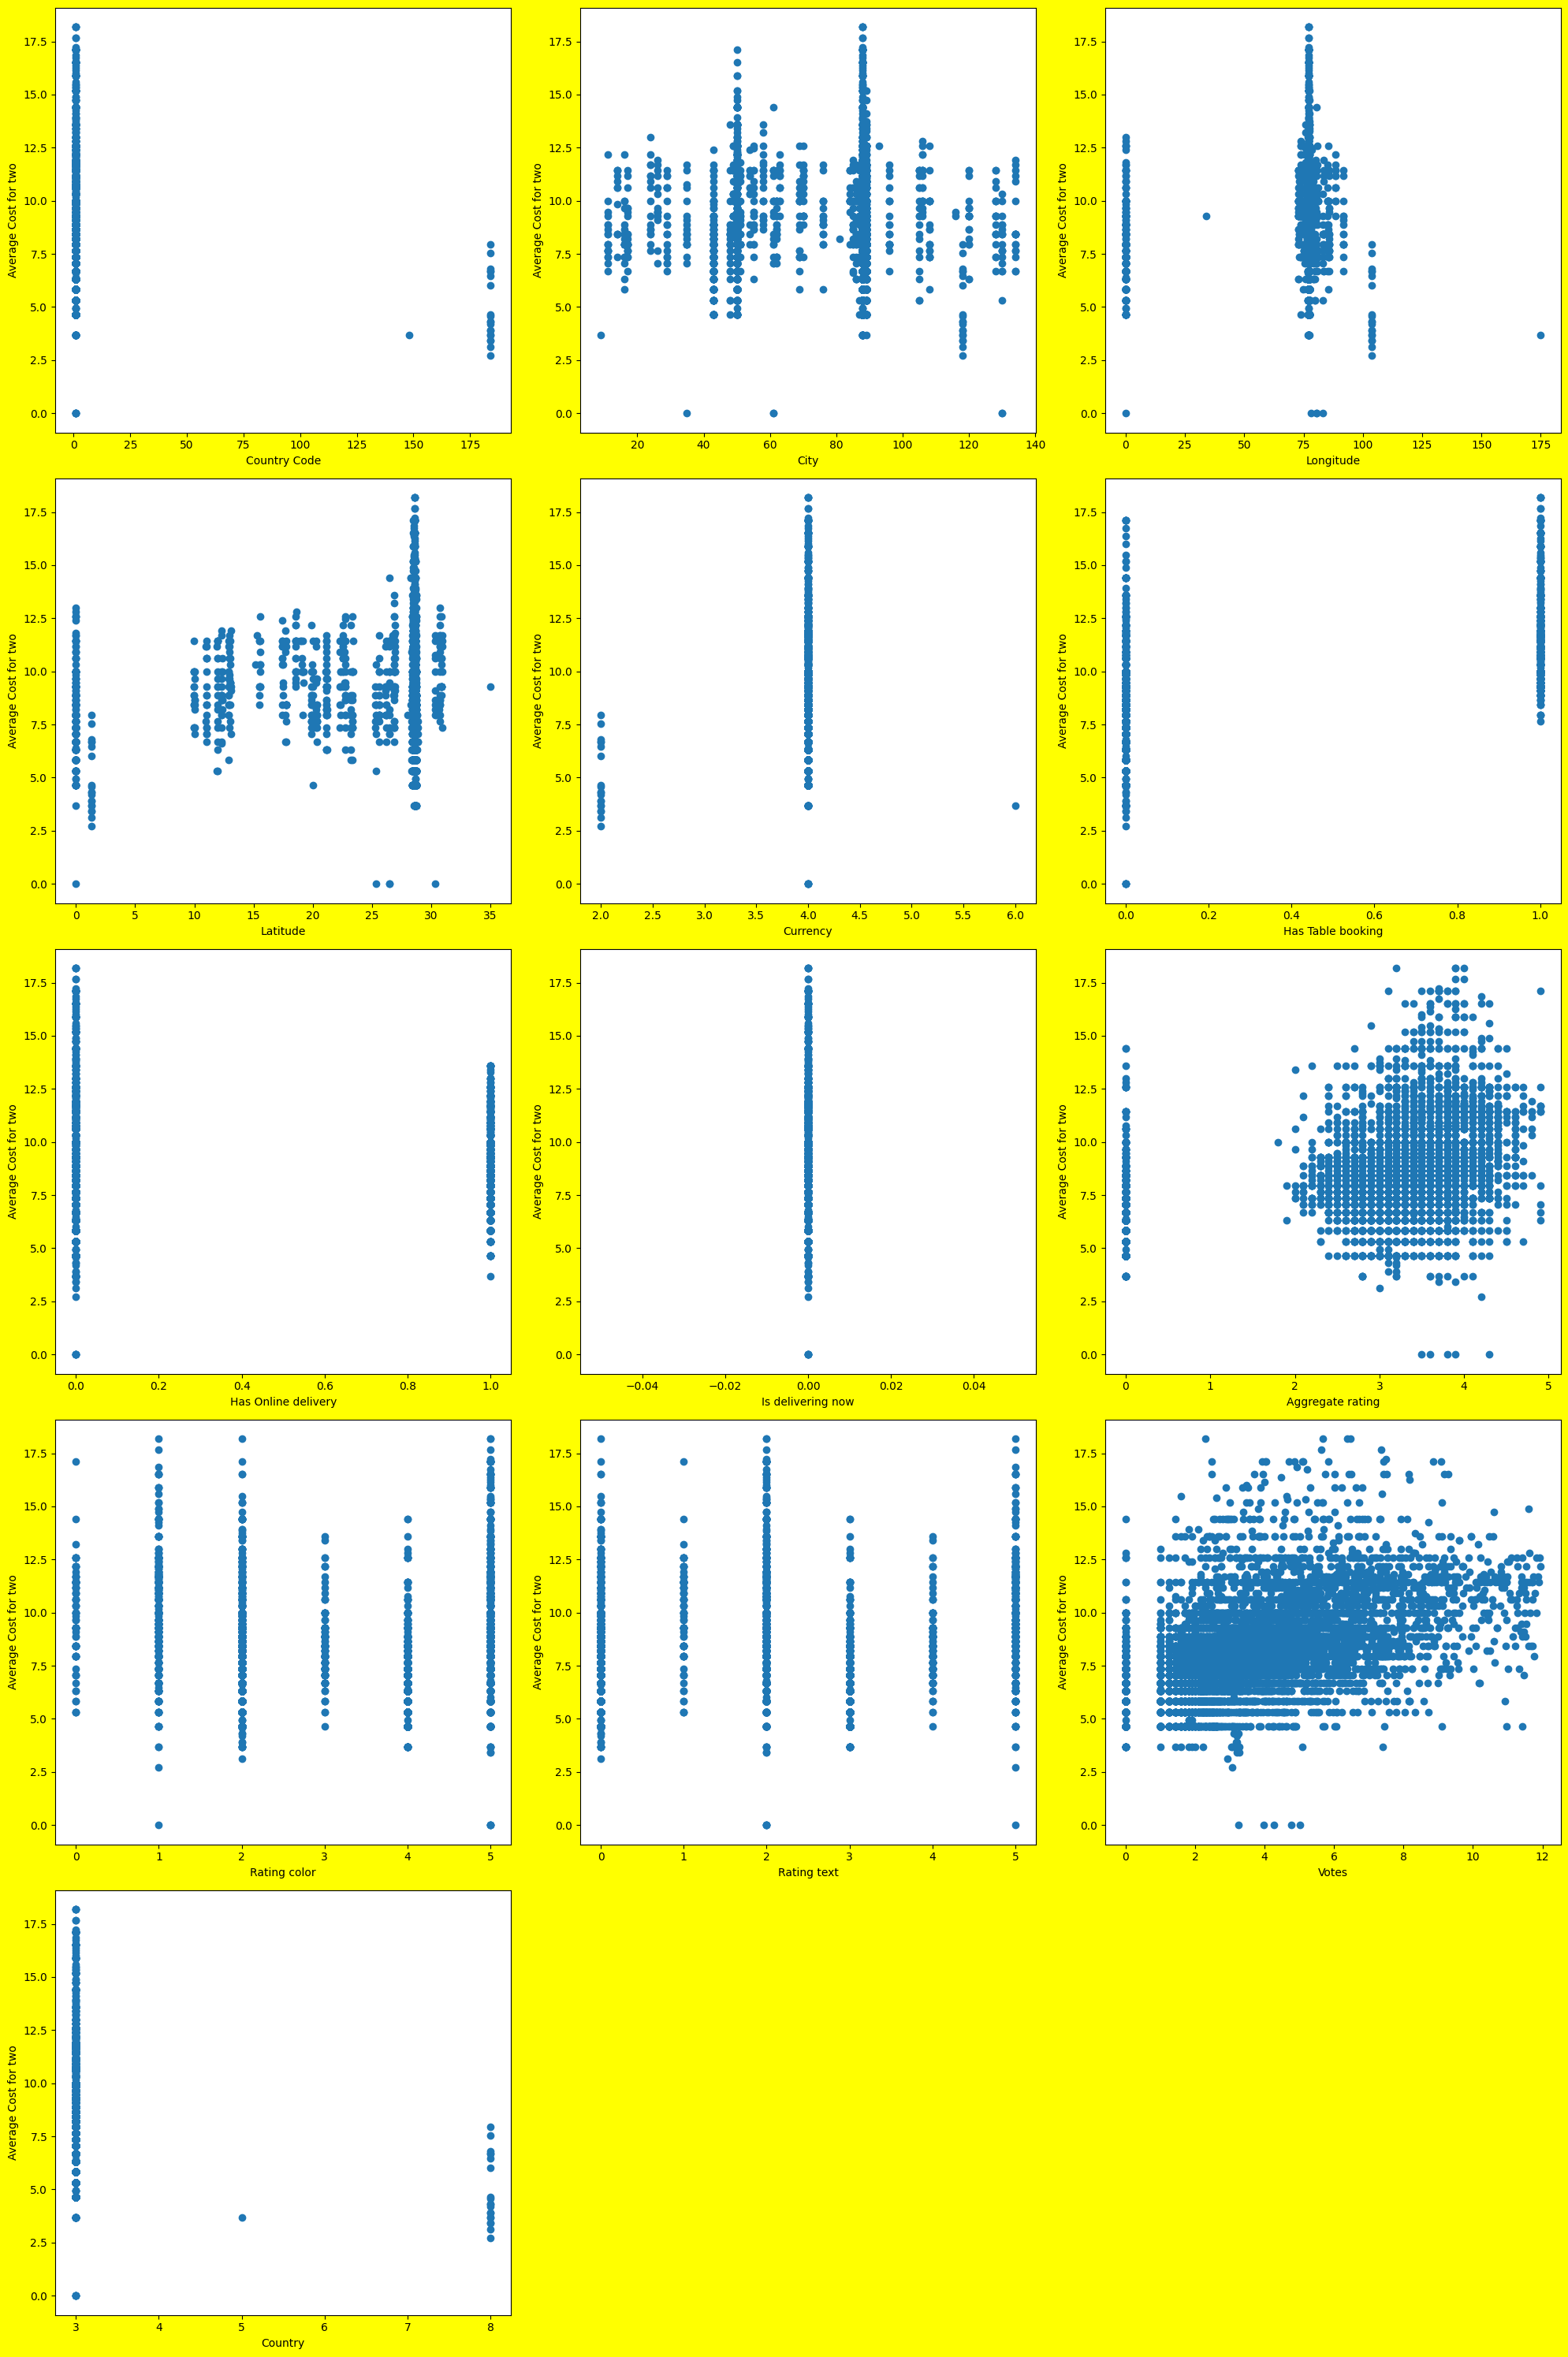

In [58]:
plt.figure(figsize=(20,30), facecolor= 'yellow')
plotnumber=1
for column in x:
    if plotnumber <=15:
        plt.subplot(5,3,plotnumber)
        plt.scatter(x[column],y['Average Cost for two'])
        plt.xlabel(column)
        plt.ylabel('Average Cost for two')
        plotnumber+=1
plt.tight_layout() 

In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x,i)for i in range(x.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,43.754472,Country Code
1,1.045574,City
2,9.202672,Longitude
3,9.438639,Latitude
4,3585.074128,Currency
5,1.158135,Has Table booking
6,1.188388,Has Online delivery
7,NaN,Is delivering now
8,3.368451,Aggregate rating
9,1.225513,Rating color


In [60]:
x=x.drop(columns='Country')

In [61]:
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [62]:
max_accuracy=0
max_rs=0
for i in range (300):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    ETR=ExtraTreesRegressor()
    ETR.fit(x_train,y_train)
    pred=ETR.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc > max_accuracy:
        max_accuracy=acc
        max_rs=i

print('Maximum accuracy:',max_accuracy, 'on random state:',max_rs)

Maximum accuracy: 0.5264801179031273 on random state: 192


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=max_rs)

In [64]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_LR_train=LR.predict(x_train)
r2t_LR=r2_score(y_test,pred_LR)
r2tr_LR=r2_score(y_train,pred_LR_train)
mab_error_LR=mean_absolute_error(y_test,pred_LR)
msq_error_LR=mean_squared_error(y_test,pred_LR)
root_error_LR=np.sqrt(mean_squared_error(y_test,pred_LR))
cv_score_LR=cross_val_score(LR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_LR)
print('avg:',cv_score_LR.mean())
r2_cv_LR=r2_score(y_test,pred_LR)-cv_score_LR.mean()

cv_score [ 3.33957600e-01  5.12739205e-01  4.77510554e-01  5.20599345e-01
 -3.10370778e+22]
avg: -6.207415554412082e+21


In [65]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_DTR=DTR.predict(x_test)
pred_DTR_train=DTR.predict(x_train)
r2t_DTR=r2_score(y_test,pred_DTR)
r2tr_DTR=r2_score(y_train,pred_DTR_train)
mab_error_DTR=mean_absolute_error(y_test,pred_DTR)
msq_error_DTR=mean_squared_error(y_test,pred_DTR)
root_error_DTR=np.sqrt(mean_squared_error(y_test,pred_DTR))
cv_score_DTR=cross_val_score(DTR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_DTR)
print('avg:',cv_score_DTR.mean())
r2_cv_DTR=r2_score(y_test,pred_DTR)-cv_score_DTR.mean()

cv_score [-1.09020649  0.05220521 -0.04413947  0.20291605 -0.10959201]
avg: -0.19776334138232332


In [66]:
ETR=ExtraTreesRegressor()
ETR.fit(x_train,y_train)
pred_ETR=ETR.predict(x_test)
pred_ETR_train=ETR.predict(x_train)
r2t_ETR=r2_score(y_test,pred_ETR)
r2tr_ETR=r2_score(y_train,pred_ETR_train)
mab_error_ETR=mean_absolute_error(y_test,pred_ETR)
msq_error_ETR=mean_squared_error(y_test,pred_ETR)
root_error_ETR=np.sqrt(mean_squared_error(y_test,pred_ETR))
cv_score_ETR=cross_val_score(ETR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_ETR)
print('avg:',cv_score_ETR.mean())
r2_cv_ETR=r2_score(y_test,pred_ETR)-cv_score_ETR.mean()

cv_score [0.30628171 0.41512017 0.36033398 0.54597243 0.39553597]
avg: 0.40464885342012824


In [67]:
KNR=KNeighborsRegressor()
KNR.fit(x_train,y_train)
pred_KNR=KNR.predict(x_test)
pred_KNR_train=KNR.predict(x_train)
r2t_KNR=r2_score(y_test,pred_KNR)
r2tr_KNR=r2_score(y_train,pred_KNR_train)
mab_error_KNR=mean_absolute_error(y_test,pred_KNR)
msq_error_KNR=mean_squared_error(y_test,pred_KNR)
root_error_KNR=np.sqrt(mean_squared_error(y_test,pred_KNR))
cv_score_KNR=cross_val_score(KNR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_KNR)
print('avg:',cv_score_KNR.mean())
r2_cv_KNR=r2_score(y_test,pred_KNR)-cv_score_KNR.mean()

cv_score [-0.9039213   0.42334026  0.35871383  0.51422202  0.34435731]
avg: 0.14734242488997146


In [68]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_RFR_train=RFR.predict(x_train)
r2t_RFR=r2_score(y_test,pred_RFR)
r2tr_RFR=r2_score(y_train,pred_RFR_train)
mab_error_RFR=mean_absolute_error(y_test,pred_RFR)
msq_error_RFR=mean_squared_error(y_test,pred_RFR)
root_error_RFR=np.sqrt(mean_squared_error(y_test,pred_RFR))
cv_score_RFR=cross_val_score(RFR,x,y,cv=5,scoring='r2')
print('cv_score',cv_score_RFR)
print('avg:',cv_score_RFR.mean())
r2_cv_RFR=r2_score(y_test,pred_RFR)-cv_score_RFR.mean()

cv_score [-0.02924383  0.46403294  0.41372119  0.54906323  0.44047216]
avg: 0.3676091371705707


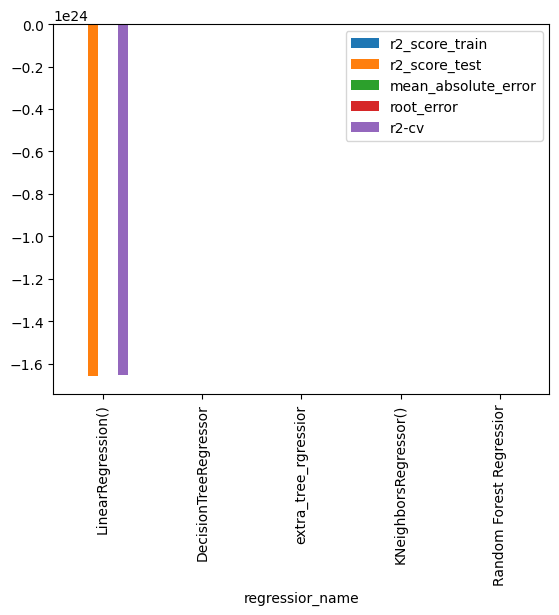

In [69]:
ml_compare=pd.DataFrame()
data1={'regressior_name':LR,'r2_score_train':r2tr_LR,'r2_score_test':r2t_LR,'mean_absolute_error':mab_error_LR,'root_error':root_error_LR,'r2-cv':r2_cv_LR}
data2={'regressior_name':'DecisionTreeRegressor','r2_score_train':r2tr_DTR,'r2_score_test':r2t_DTR,'mean_absolute_error':mab_error_DTR,'root_error':root_error_DTR,'r2-cv':r2_cv_DTR}
data3={'regressior_name':'extra_tree_rgressior','r2_score_train':r2tr_ETR,'r2_score_test':r2t_ETR,'mean_absolute_error':mab_error_ETR,'root_error':root_error_ETR,'r2-cv':r2_cv_ETR}
data4={'regressior_name':KNR,'r2_score_train':r2tr_KNR,'r2_score_test':r2t_KNR,'mean_absolute_error':mab_error_KNR,'root_error':root_error_KNR,'r2-cv':r2_cv_KNR}
data5={'regressior_name':'Random Forest Regressior','r2_score_train':r2tr_RFR,'r2_score_test':r2t_RFR,'mean_absolute_error':mab_error_RFR,'root_error':root_error_RFR,'r2-cv':r2_cv_RFR}
ml_compare=ml_compare.append([data1,data2,data3,data4,data5],ignore_index=True)
ml_compare=ml_compare.set_index(['regressior_name'])
ml_compare.plot.bar()
plt.show()

In [70]:
pr={'n_estimators':[100],'criterion':['absolute_error','friedman_mse','poisson','squared_error'],'random_state':[100,200,300],'min_samples_split':[2]}
GCV=GridSearchCV(RandomForestRegressor(),param_grid=pr,cv=5)
final=GCV.fit(x_train,y_train)
print(final.best_params_)

{'criterion': 'absolute_error', 'min_samples_split': 2, 'n_estimators': 100, 'random_state': 200}


In [71]:
final_model=RandomForestRegressor(n_estimators=100,criterion='squared_error',min_samples_split=2,random_state=100)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
acc=r2_score(y_test,pred)
print('accuracy_score is:',acc*100)

accuracy_score is: 58.452347186780976


In [72]:
import pickle
file_name='ZOMATO_COST_ANALYSIS.pkl'
pickle.dump(final_model,open(file_name,'wb'))